In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv(r'C:\Users\jatin\Desktop\dlProject\new\cs-training.csv')

# Handle missing values
data = data.fillna(0)  # Replace missing values with 0 for simplicity

# Split the dataset into features and labels
X_train = data.drop(columns=['SeriousDlqin2yrs'])
y_train = data['SeriousDlqin2yrs']

datat = pd.read_csv(r'C:\Users\jatin\Desktop\dlProject\new\cs-test.csv')

# Handle missing values
datat = datat.fillna(0)  # Replace missing values with 0 for simplicity

# Split the dataset into features and labels
X_test = data.drop(columns=['SeriousDlqin2yrs'])
y_test = data['SeriousDlqin2yrs']

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now X_train_scaled and X_test_scaled are the preprocessed feature sets
# y_train and y_test are the corresponding labels

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

# Save the trained model
model.save('credit_scoring_model.h5')

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                768       
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
 709/4219 [====>.........................] - ETA: 3s - loss: 0.2306 - accuracy: 0.9307

KeyboardInterrupt: 

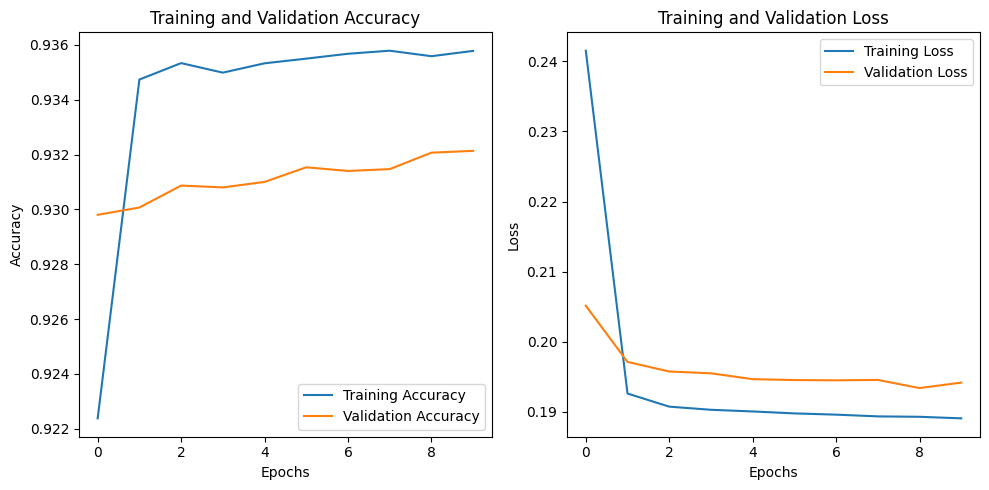

In [ ]:
import matplotlib.pyplot as plt

# Access training history
training_accuracy = minimal_history.history['accuracy']
validation_accuracy = minimal_history.history['val_accuracy']
training_loss = minimal_history.history['loss']
validation_loss = minimal_history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

4688/4688 [==============================] - 3s 620us/step


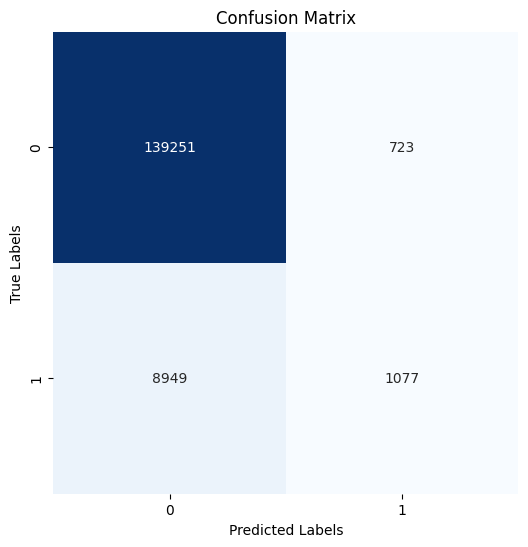

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97    139974
           1       0.60      0.11      0.18     10026

    accuracy                           0.94    150000
   macro avg       0.77      0.55      0.57    150000
weighted avg       0.92      0.94      0.91    150000



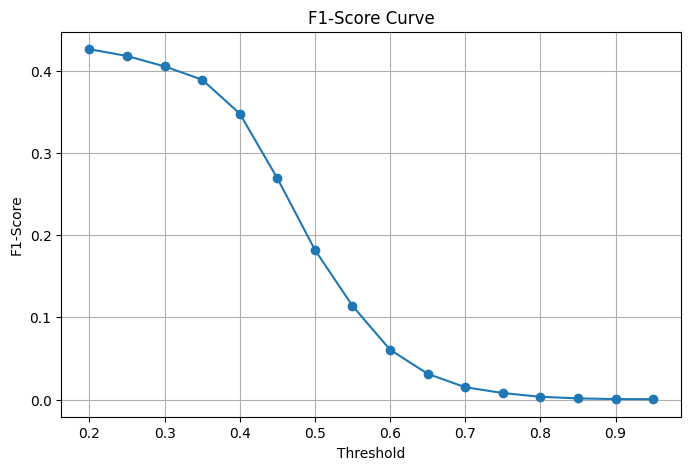

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import seaborn as sns
import numpy as np

# Make predictions on the test set
minimal_y_pred_probs = minimal_model.predict(X_test_scaled)
minimal_y_pred = (minimal_y_pred_probs > 0.5).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, minimal_y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, minimal_y_pred))

# F1-Score Curve
f1_scores = []
thresholds = np.arange(0.2, 1.0, 0.05)
for threshold in thresholds:
    y_pred_thresholded = (minimal_y_pred_probs > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_thresholded)
    f1_scores.append(f1)

plt.figure(figsize=(8, 5))
plt.plot(thresholds, f1_scores, marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score Curve')
plt.grid()
plt.show()

In [ ]:
TRYING OTHER TYPES OF ANN models

In [ ]:
#slight complex model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Define the neural network architecture with dropout
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))  # Adding dropout layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a learning rate schedule
def lr_schedule(epoch):
    learning_rate = 0.001
    if epoch > 10:
        learning_rate = 0.0001
    return learning_rate

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping callback
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32,
                    validation_split=0.1, callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/30
1356/4219 [========>.....................] - ETA: 2s - loss: 0.2340 - accuracy: 0.9335

KeyboardInterrupt: 

In [ ]:
# more complex model
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define a more complex neural network architecture with dropout and batch normalization
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())  # Adding batch normalization layer
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with custom optimizer and learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define a more aggressive learning rate schedule
def lr_schedule(epoch):
    if epoch < 10:
        return 0.001
    elif epoch < 20:
        return 0.0001
    else:
        return 0.00001

# Learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Early stopping callback
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

# Train the model with callbacks
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=64,
                    validation_split=0.1, callbacks=[lr_scheduler, early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
2110/2110 [==============================] - 4s 2ms/step - loss: 0.2159 - accuracy: 0.9336 - val_loss: 0.2129 - val_accuracy: 0.9299 - lr: 0.0010
Epoch 2/50
2110/2110 [==============================] - 3s 2ms/step - loss: 0.1977 - accuracy: 0.9348 - val_loss: 0.1994 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 3/50
2110/2110 [==============================] - 3s 2ms/step - loss: 0.1938 - accuracy: 0.9357 - val_loss: 0.2056 - val_accuracy: 0.9309 - lr: 0.0010
Epoch 4/50
2110/2110 [==============================] - 3s 2ms/step - loss: 0.1929 - accuracy: 0.9357 - val_loss: 0.1988 - val_accuracy: 0.9301 - lr: 0.0010
Epoch 5/50
2110/2110 [==============================] - 4s 2ms/step - loss: 0.1913 - accuracy: 0.9363 - val_loss: 0.1959 - val_accuracy: 0.9321 - lr: 0.0010
Epoch 6/50
2110/2110 [==============================] - 4s 2ms/step - loss: 0.1913 - accuracy: 0.9360 - val_loss: 0.1956 - val_accuracy: 0.9299 - lr: 0.0010
Epoch 7/50
2110/2110 [==============================] - 4s

In [ ]:
#very simple mode
# Define a minimal neural network architecture
minimal_model = Sequential()
minimal_model.add(Dense(8, activation='relu', input_shape=(X_train_scaled.shape[1],)))
minimal_model.add(Dense(1, activation='sigmoid'))

# Compile the minimal model
minimal_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the minimal model
minimal_history = minimal_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32,
                                    validation_split=0.1)

# Evaluate the minimal model on the test set
minimal_test_loss, minimal_test_accuracy = minimal_model.evaluate(X_test_scaled, y_test)
print("Minimal Model Test Accuracy:", minimal_test_accuracy)

Epoch 1/10
4219/4219 [==============================] - 4s 914us/step - loss: 0.2415 - accuracy: 0.9224 - val_loss: 0.2051 - val_accuracy: 0.9298
Epoch 2/10
4219/4219 [==============================] - 4s 908us/step - loss: 0.1926 - accuracy: 0.9347 - val_loss: 0.1971 - val_accuracy: 0.9301
Epoch 3/10
4219/4219 [==============================] - 4s 915us/step - loss: 0.1907 - accuracy: 0.9353 - val_loss: 0.1957 - val_accuracy: 0.9309
Epoch 4/10
4219/4219 [==============================] - 4s 904us/step - loss: 0.1903 - accuracy: 0.9350 - val_loss: 0.1955 - val_accuracy: 0.9308
Epoch 5/10
4219/4219 [==============================] - 4s 971us/step - loss: 0.1900 - accuracy: 0.9353 - val_loss: 0.1947 - val_accuracy: 0.9310
Epoch 6/10
4219/4219 [==============================] - 4s 936us/step - loss: 0.1898 - accuracy: 0.9355 - val_loss: 0.1945 - val_accuracy: 0.9315
Epoch 7/10
4219/4219 [==============================] - 4s 930us/step - loss: 0.1896 - accuracy: 0.9357 - val_loss: 0.1945 -